# Quant Trading Course (for beginners)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

### Simple vs Compound interest

In [29]:
# Parameters
number_of_trades = 2000
cost = 0.001
average_return = 0.01

# Generate random returns
np.random.seed(42)  # For reproducibility
returns = np.random.choice([-average_return-cost,average_return-cost], number_of_trades, p=[0.40, 0.60])

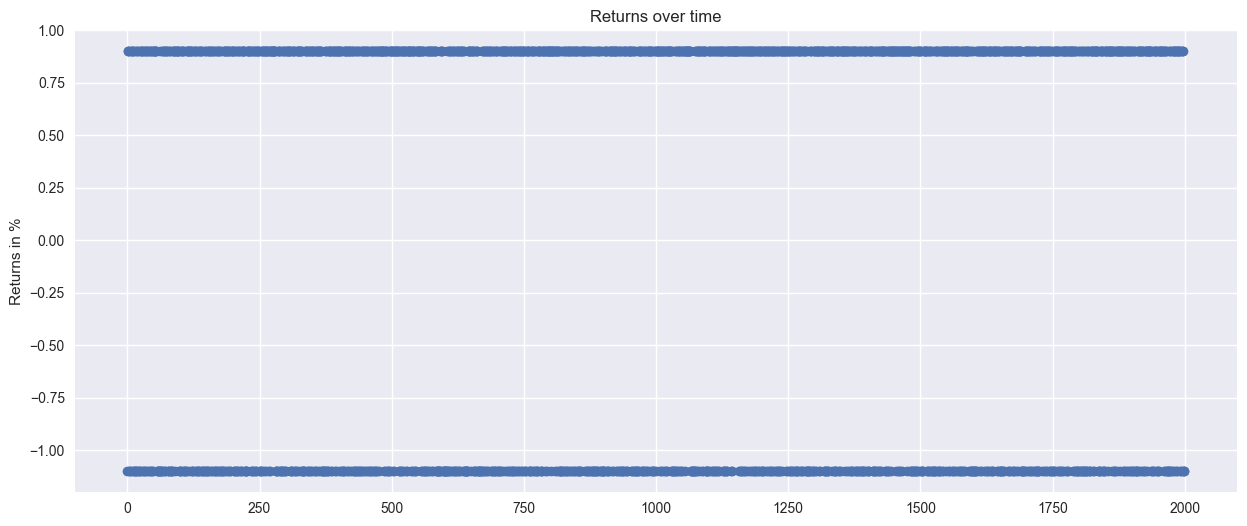

In [30]:
# Show the graph
plt.figure(figsize=(15,6))
plt.plot(returns*100, "o")
plt.title("Returns over time")
plt.ylabel("Returns in %")
plt.show()

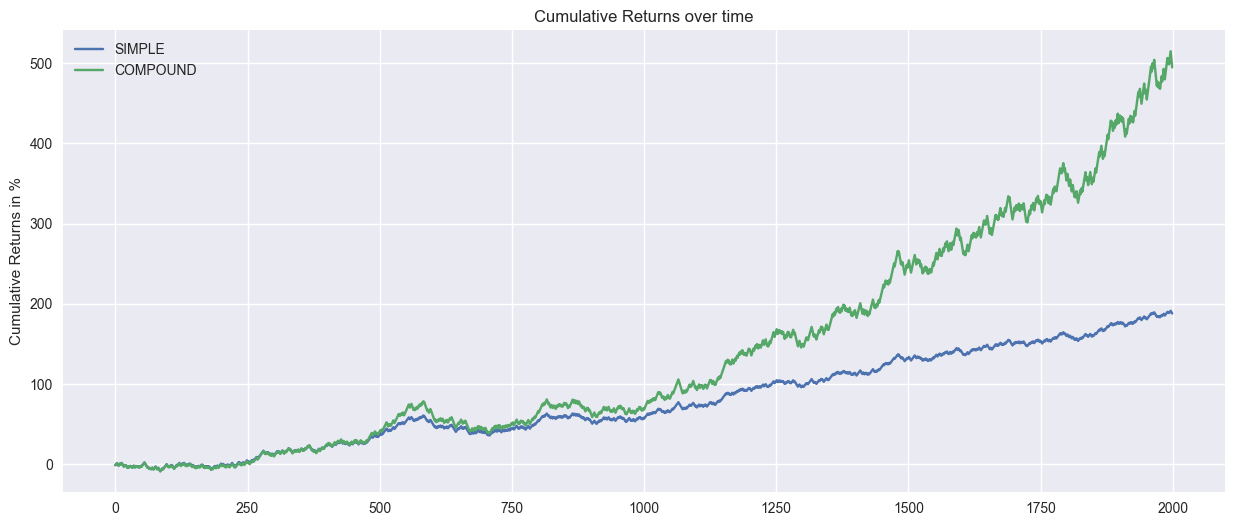

In [31]:
# Compute the cumulative sum
returns_cumsum = returns.cumsum()*100
returns_cumprod = ((1+returns).cumprod()-1)*100

# Show the graph
plt.figure(figsize=(15,6))
plt.plot(returns_cumsum, label="SIMPLE")
plt.plot(returns_cumprod, label="COMPOUND")
plt.title("Cumulative Returns over time")
plt.ylabel("Cumulative Returns in %")
plt.legend()
plt.show()

### Compound interest dark side

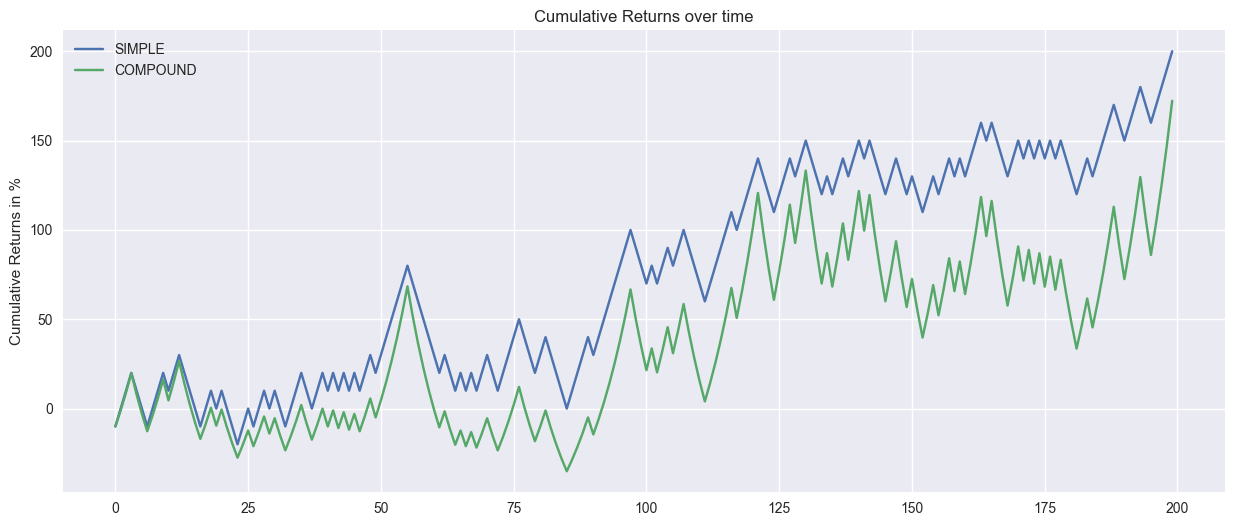

In [75]:
# Parameters
number_of_trades = 200
average_return = 0.10

# Generate random returns
np.random.seed(42)  # For reproducibility
returns = np.random.choice([-average_return,average_return], number_of_trades, p=[0.40, 0.60])


# Compute the cumulative sum
returns_cumsum = returns.cumsum()*100
returns_cumprod = ((1+returns).cumprod()-1)*100

# Show the graph
plt.figure(figsize=(15,6))
plt.plot(returns_cumsum, label="SIMPLE")
plt.plot(returns_cumprod, label="COMPOUND")
plt.title("Cumulative Returns over time")
plt.ylabel("Cumulative Returns in %")
plt.legend()
plt.show()

### 99% of the backtest are wrong

In [61]:
df = yf.download("BTC-USD").loc["2018":]
df.columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01 00:00:00+00:00,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02 00:00:00+00:00,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03 00:00:00+00:00,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04 00:00:00+00:00,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05 00:00:00+00:00,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072
...,...,...,...,...,...,...
2024-11-01 00:00:00+00:00,69482.468750,69482.468750,71559.015625,68779.703125,70216.898438,49989795365
2024-11-02 00:00:00+00:00,69289.273438,69289.273438,69867.351562,69033.718750,69486.023438,18184612091
2024-11-03 00:00:00+00:00,68741.117188,68741.117188,69361.656250,67482.523438,69296.382812,34868307655


<Axes: xlabel='Date'>

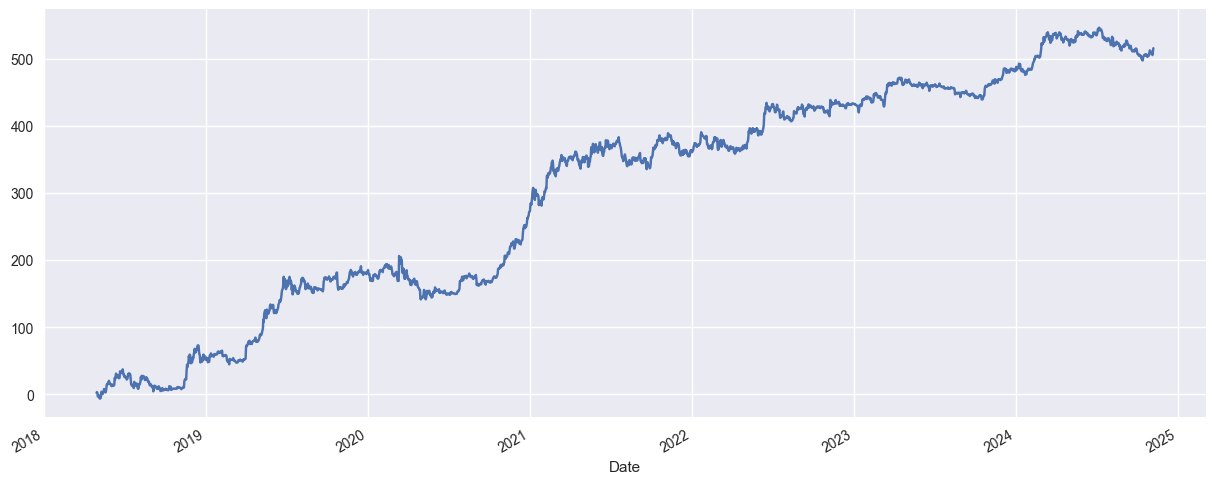

In [81]:
# Create a fast moving average
df["SMA fast"] = df["Close"].rolling(2).mean()

# Create a slow moving average
df["SMA slow"] = df["Close"].rolling(119).mean()

df["position"]=np.nan

# Create the condition
df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1
df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1

# Compute the percentage of variation of the asset
df["pct"] = df["Close"].pct_change(1)

# Compute the return of the strategy
df["return"] = df["pct"] * df["position"].shift(1)


(df["return"].cumsum()*100).plot(figsize=(15,6))

In [63]:
df

,Adj Close,Close,High,Low,Open,Volume,SMA fast,SMA slow,position,pct,return
Date,,,,,,,,,,,
2018-01-01 00:00:00+00:00,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000,13657.200195,NaN,NaN,NaN,NaN
2018-01-02 00:00:00+00:00,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192,14982.099609,NaN,NaN,0.097011,NaN
2018-01-03 00:00:00+00:00,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160,15201.000000,NaN,NaN,0.014611,NaN
2018-01-04 00:00:00+00:00,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744,15599.200195,NaN,NaN,0.026196,NaN
2018-01-05 00:00:00+00:00,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072,17429.500000,NaN,NaN,0.117333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 00:00:00+00:00,69482.468750,69482.468750,71559.015625,68779.703125,70216.898438,49989795365,69482.468750,62344.000657,1.0,-0.010435,-0.010435
2024-11-02 00:00:00+00:00,69289.273438,69289.273438,69867.351562,69033.718750,69486.023438,18184612091,69289.273438,62436.317752,1.0,-0.002780,-0.002780
2024-11-03 00:00:00+00:00,68741.117188,68741.117188,69361.656250,67482.523438,69296.382812,34868307655,68741.117188,62544.653952,1.0,-0.007911,-0.007911


In [78]:
values = []
for i in range(1,100):
    for j in range(100,200):
        
        val = [i,j]
        # Create a fast moving average
        df["SMA fast"] = df["Close"].rolling(i).mean()

        # Create a slow moving average
        df["SMA slow"] = df["Close"].rolling(j).mean()
        
        df["position"]=np.nan

        # Create the condition
        df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1
        df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1
        
        # Compute the percentage of variation of the asset
        df["pct"] = df["Close"].pct_change(1)

        # Compute the return of the strategy
        df["return"] = df["pct"] * df["position"].shift(1)
        
        cumsum_ret = df["return"].cumsum().iloc[-1]*100
        val.append(cumsum_ret)
        values.append(val)

In [79]:
df_values = pd.DataFrame(values)

In [80]:
df_values.sort_values(by=2, ascending=False)

,0,1,2
119,2,119,515.801273
19,1,119,512.705504
24,1,124,509.655163
17,1,117,507.247108
18,1,118,504.900168
...,...,...,...
1697,17,197,80.601307
1796,18,196,79.573635
8501,86,101,79.088308
3395,34,195,75.479333


In [76]:
df_values.sort_values(by=2, ascending=True)

,0,1,2
8500,86,100,70.282839
3395,34,195,75.479333
8501,86,101,79.088308
1796,18,196,79.573635
1697,17,197,80.601307
...,...,...,...
18,1,118,504.900168
17,1,117,507.247108
24,1,124,509.655163
19,1,119,512.705504
